In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import gmaps
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels

ModuleNotFoundError: No module named 'gmaps'

In [12]:
#import csv file
data=pd.read_csv("Food_Inspections.csv")

In [13]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2345928,ALBANY CHILD CARE CENTER,ALBANY CHILD CARE CENTER,2215697.0,Daycare Above and Under 2 Years,Risk 1 (High),5954 S ALBANY AVE,CHICAGO,IL,60629.0,11/19/2019,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.784667,-87.701011,"(41.784667360966026, -87.7010111792713)"
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
2,2078297,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,8/11/2017,License,Pass,NaN,NaN,NaN,NaN
3,2369894,"JIMMY'S FOOD & DELI,INC",JIMMY'S FOOD & DELI,2511672.0,Grocery Store,Risk 2 (Medium),5601 W MADISON ST,CHICAGO,IL,60644.0,4/29/2020,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.880135,-87.764942,"(41.880135062255434, -87.7649424467103)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"


In [14]:
#number or rows and columns in the dataset
print(data.shape)

(208254, 17)


In [15]:
#check if there are any null values
data.isnull().values.any()

True

In [16]:
#view all the columns that have null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
License #             17
Facility Type       4861
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
Latitude             688
Longitude            688
Location             688
dtype: int64

In [17]:
#look at specific column that have nulls
print(data[data["License #"].isnull()][null_columns])

                               AKA Name  License #  \
18504              ST. DEMETRIOS CHURCH        NaN   
34322              ST. DEMETRIOS CHURCH        NaN   
44385              ST. DEMETRIOS CHURCH        NaN   
46658   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
46802                   ARGENTINA FOODS        NaN   
58588              ST. DEMETRIOS CHURCH        NaN   
87997   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
99520              ST. DEMETRIOS CHURCH        NaN   
115407         OLD ST. PATRICK'S CHURCH        NaN   
131995                              NaN        NaN   
151006         OLD ST. PATRICK'S CHURCH        NaN   
152958             ST. DEMETRIOS CHURCH        NaN   
156206  GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
173769                              NaN        NaN   
182102             ST. DEMETRIOS CHURCH        NaN   
184207             ST. DEMETRIOS CHURCH        NaN   
192512             ST. DEMETRIOS CHURCH        NaN   

                      Facil

In [18]:
# filter the dataset by facility type =restaurant and look at its shape
restaurant_data = data[data['Facility Type']=="Restaurant"]
print(restaurant_data.shape)

(138590, 17)


In [19]:
restaurant_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [20]:
# we want to keep just the restaurants where we know the location, so we drop the rows where location is NaN:
restaurants_df = restaurant_data[restaurant_data['Location'].notna()]
restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [21]:
#number of unique zip codes in the dataset:
len(restaurants_df['Zip'].unique().tolist())

60

In [22]:
#make sure there are no more null values in the "location" column
null_columns=restaurants_df.columns[restaurants_df.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
dtype: int64

In [23]:
#how many unique restaurants we have in the data based on location:
len(restaurants_df['Location'].unique().tolist())

9523

In [24]:
# eliminate restaurants that are "out of business" or "business not located":
clean_data=restaurants_df[(restaurants_df['Results'] != 'Out of Business') & (restaurants_df['Results'] != 'Business Not Located')]

In [25]:
#find out how many unique restaurant locations we have in our dataset after the drop:
len(clean_data['Location'].unique().tolist())

9380

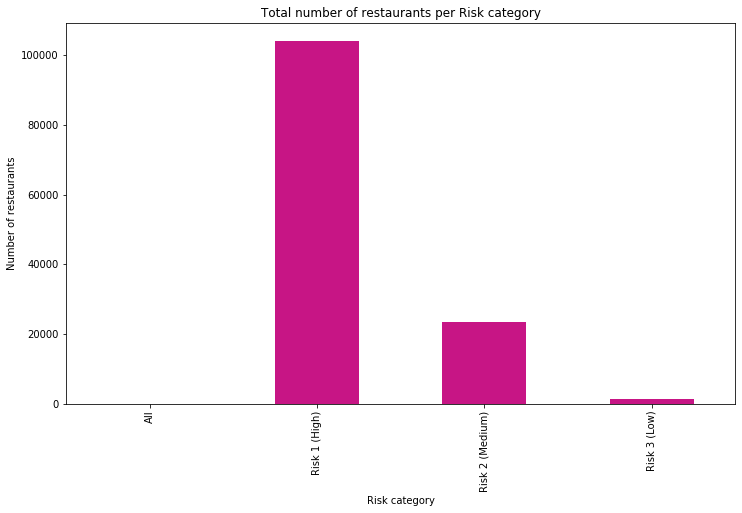

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of restaurants for each Risk category 

#First, we use groupby "risk category" and count location to determine the data points
risk_data_points = clean_data.groupby(["Risk"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="mediumvioletred", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Total number of restaurants per Risk category")
plt.xlabel("Risk category")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.show()
plt.tight_layout()

In [27]:
#We can see that most restaurants are at high risk. We can also confirm this from the data:
clean_data['Risk'].value_counts()

Risk 1 (High)      103971
Risk 2 (Medium)     23467
Risk 3 (Low)         1350
All                     8
Name: Risk, dtype: int64

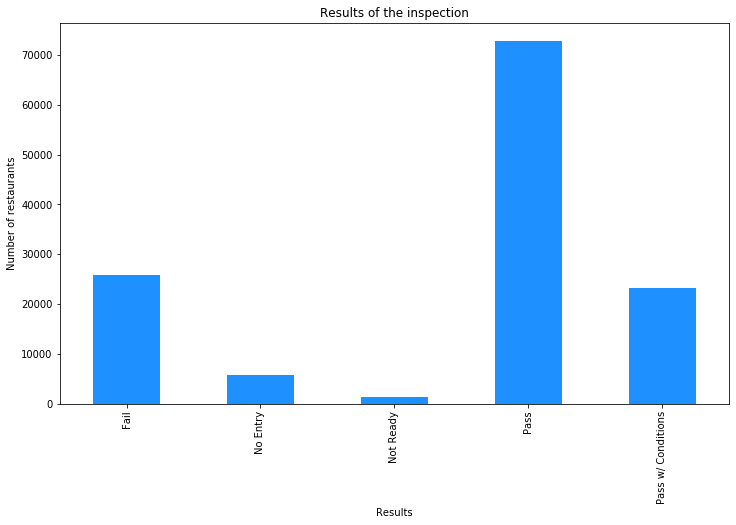

<Figure size 432x288 with 0 Axes>

In [28]:
#Next, we look at the results of the inspections

#First, we use groupby "Results" and count location to determine the data points
risk_data_points = clean_data.groupby(["Results"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="dodgerblue", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Results of the inspection")
plt.xlabel("Results")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.show()
plt.tight_layout()

In [29]:
#confirm from the data:
clean_data['Results'].value_counts()

Pass                  72792
Fail                  25735
Pass w/ Conditions    23220
No Entry               5678
Not Ready              1374
Name: Results, dtype: int64

In [30]:
clean_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [31]:
#Drop the rows where Risk= All or where we have nan and only keep high, medium or low risk
final_dataset=clean_data[clean_data.Risk!='All']
final_dataset['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', nan],
      dtype=object)

In [32]:
final_risk=final_dataset[final_dataset.Risk.notnull()]
final_risk['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], dtype=object)

In [33]:
X = pd.get_dummies(data.Risk)

In [34]:
X = X.drop(columns=['All'])

In [35]:
Y = final_dataset['Results']

In [36]:
Y

1                       Fail
4         Pass w/ Conditions
8         Pass w/ Conditions
9                       Pass
10                      Pass
                 ...        
208246                  Pass
208250                  Pass
208251    Pass w/ Conditions
208252                  Pass
208253                  Fail
Name: Results, Length: 128791, dtype: object

In [37]:
#Logistic Regression

In [38]:
# Next, we want to see if there is a correlation between Risk Category and Inspection Results.
# How good is risk category at predicting if a restaurant is going to pass/fail the inspections?

In [39]:
print(list(final_risk.columns))

['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude', 'Location']


In [40]:
#We know that logistic regression requires our response variable to be binary. For this analysis, we will consider "Pass" and Pass w/Conditions" as Pass(1)
#and "Fail", "Not Ready" and "No Entry" as Fail(0)

results_numerical = {"Results" :{"Pass": 1, "Pass w/ Conditions": 1, "Fail":0, "Not Ready":0, "No Entry":0}}
print(results_numerical)

{'Results': {'Pass': 1, 'Pass w/ Conditions': 1, 'Fail': 0, 'Not Ready': 0, 'No Entry': 0}}


In [41]:
final_df=final_risk.replace(results_numerical)
final_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,0,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,1,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,1,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [42]:
#univariate logistic regression
#define our X and Y
Y=list(final_df['Results'])


In [43]:
#dummy variabke for X
X = pd.get_dummies(final_df['Risk'])

In [44]:
data=final_data[['Risk','Results']]
data

NameError: name 'final_data' is not defined

In [45]:
y=data.Results

In [46]:
y.value_counts()

Pass                    109675
Fail                     40267
Pass w/ Conditions       31134
Out of Business          18110
No Entry                  6887
Not Ready                 2109
Business Not Located        72
Name: Results, dtype: int64

In [47]:
#create samples
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
Risk_train, Risk_test, Results_train, Results_test= train_test_split(X,Y, test_size=0.3, random_state=0)

ModuleNotFoundError: No module named 'imblearn'

In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.566879
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.001      
Dependent Variable: y                AIC:              146020.3134
Date:               2020-07-27 17:56 BIC:              146049.6112
No. Observations:   128788           Log-Likelihood:   -73007.    
Df Model:           2                LL-Null:          -73051.    
Df Residuals:       128785           LLR p-value:      7.4432e-20 
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
                 Coef.   Std.Err.     z      P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Risk 1 (High)    1.0555    0.0071  148.9388  0.0000  1.0416  1.0694
Risk 2 (Medium)  1.1838    0.0154   76.8183  0.00

In [49]:
#Test the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Risk_train, Risk_test, Results_train, Results_test = train_test_split(data['Risk'], data['Results'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(pd.DataFrame(Risk_train),Results_train)
Results_pred = logreg.predict(pd.DataFrame(Risk_test))
Results_pred

NameError: name 'train_test_split' is not defined

In [50]:
# Check the accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(pd.DataFrame(Risk_test),pd.DataFrame (Results_test))))

NameError: name 'logreg' is not defined

In [51]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(pd.DataFrame(Results_test), pd.DataFrame(Results_pred))
print(confusion_matrix)


NameError: name 'Results_test' is not defined

In [52]:
from sklearn.metrics import classification_report
print(classification_report(pd.DataFrame(Results_test), pd.DataFrame(Results_pred)))

NameError: name 'Results_test' is not defined

In [53]:
#Kynan isolate complaint inspections and canvas inspections
complaint_data = clean_data[clean_data["Inspection Type"]== "Complaint"]
canvass_data = clean_data[clean_data["Inspection Type"]== "Canvass"]

In [54]:
#Kynan look at inspection pass fail rates by inspection type
complaint_consequence = complaint_data["Results"]
canvass_consequence = canvass_data["Results"]
complaint_consequence.value_counts()
com_consequences = ["Pass", "Fail", "Pass w/Conditions", "No Entry", " "]
canvass_consequence.value_counts()
can_consequences = ["Pass", "Pass w/Conditions",  "Fail","No Entry", " "]
complaint_consequence.value_counts()

Pass                  6190
Fail                  4580
Pass w/ Conditions    3273
No Entry               660
Not Ready               12
Name: Results, dtype: int64

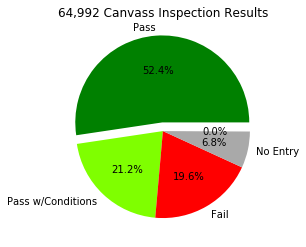

In [55]:
#Kynan visualize Inspection results for Canvass Inspections
colors_can = ["green", "Chartreuse", "red", "darkgrey", "white"]
explode = (0.1,0,0,0,0)
plt.pie(canvass_consequence.value_counts(), labels = can_consequences, autopct="%1.1f%%", colors = colors_can, explode = explode)
plt.title("64,992 Canvass Inspection Results")
plt.savefig("Canvass Inspection Results")


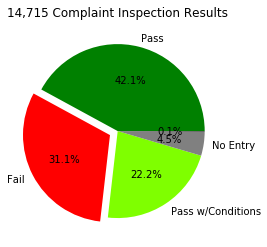

In [56]:
#Kynan visualize inspection results for 
colors_com = ["green", "red","Chartreuse", "grey", "black"]
explode = (0,0.1,0,0,0)
plt.pie(complaint_consequence.value_counts(), labels = com_consequences, autopct="%1.1f%%", colors = colors_com, explode = explode)
plt.title("14,715 Complaint Inspection Results")
plt.savefig("Complaint Inspection Results")

In [57]:
#Kynan look at complaint and canvas inspections by zip code
complaint_zip_count = complaint_data["Zip"].value_counts()
canvass_zip_count = canvass_data["Zip"].value_counts()
complaint_zip_count = complaint_zip_count.sort_index()
canvass_zip_count = canvass_zip_count.sort_index()

In [58]:
# Kynan create variables for total canvass inspections and total complaint inspections
canvass_sum = canvass_zip_count.sum()
complaint_sum = complaint_zip_count.sum()


In [59]:
#Kynan calculate relative distribution of canvas and complaint based inspections per zip code
complaint_percent = []
canvass_percent = []
for complaint in complaint_zip_count:
    complaint_percent.append((complaint/complaint_sum)*100)

for canvass in canvass_zip_count:
    canvass_percent.append(canvass/canvass_sum*100)

# add null value to complaint percent
complaint_percent.append(0)
# format to percent 
#complaint_percent = ['{:.2f}%'.format(elem) for elem in complaint_percent]
#canvass_percent =  ['{:.2f}%'.format(elem) for elem in canvass_percent]
#canvass_percent = canvass_percent.astype(float)
#round complaint zip count
#complaint_zip_count = ['{:f}'.format(elem) for elem in complaint_zip_count]

In [60]:
#Kynan combine complaint and canvass data into new df add zip code as int
relative_inspection_types = pd.DataFrame({"Canvass Raw": canvass_zip_count, "Complaint Raw": complaint_zip_count, 
                                          "Canvass Percent": canvass_percent,
                                          "Complaint Percent": complaint_percent})
zips = relative_inspection_types.index
zips.astype(int)

relative_inspection_types["Zip"] = zips

In [61]:
# Kynan calculate which zip codes get a disproportional share of complaint based inspections by calculating an expected number of complaints
relative_inspection_types["Expected Complaints"] = round(relative_inspection_types["Canvass Percent"]/100 * complaint_sum)
relative_inspection_types["Complaint Index"] = relative_inspection_types["Complaint Raw"]/relative_inspection_types["Expected Complaints"]*100

In [62]:
#Kynan add the differnece to df
relative_inspection_types = relative_inspection_types.sort_values(["Complaint Index"])


In [63]:
#Kynan calculate  chi square critical value 
import scipy.stats as stats
chi_square = pd.DataFrame([relative_inspection_types["Complaint Raw"], relative_inspection_types["Expected Complaints"]]).T
chi_square = chi_square.drop([60827.0], axis = 0)
critical_value = stats.chi2.ppf(q = 0.95, df = 57)
critical_value


75.62374846937608

In [64]:
#Kynan calcualte chi square value
stats.chisquare(chi_square['Complaint Raw'], chi_square['Expected Complaints'])

Power_divergenceResult(statistic=4556.242367484178, pvalue=0.0)

In [65]:
print("Since the chi square value of 3615 is larger than the critical value of 75, we conclude the results are statistically significant")

Since the chi square value of 3615 is larger than the critical value of 75, we conclude the results are statistically significant


In [66]:
#Kynan isolate and visualize the zips that have the most relative complaints
too_many_complaints = relative_inspection_types.iloc[54:59, :]
#x_axis = (["Kenwood","Roseland","South Shore", "Auburn Gresham", "Chatham"])
#plt.bar(x_axis, too_many_complaints["Complaint Index"])

In [67]:
# Kynan add income and lat/long data
demo_path = "Demographics.csv"
demo_request = pd.read_csv(demo_path)
inspection_demo = pd.merge(relative_inspection_types, demo_request, on = "Zip")

In [68]:
#kynan convert income to float

inspection_demo.dtypes

Canvass Raw              int64
Complaint Raw          float64
Canvass Percent        float64
Complaint Percent      float64
Zip                    float64
Expected Complaints    float64
Complaint Index        float64
Location                object
Population             float64
Income                 float64
dtype: object

In [69]:
#Kynan review merged file.
inspection_demo.head()

,Canvass Raw,Complaint Raw,Canvass Percent,Complaint Percent,Zip,Expected Complaints,Complaint Index,Location,Population,Income
0,597,68.0,0.918659,0.462145,60646.0,135.0,50.370370,"41.992931, -87.760278",27016.0,58232.0
1,542,62.0,0.834026,0.421367,60631.0,123.0,50.406504,"41.994948, -87.813225",28832.0,55316.0
2,1768,202.0,2.720586,1.372842,60606.0,400.0,50.500000,"41.881988, -87.637329",NaN,100377.0
3,1536,205.0,2.363586,1.393231,60634.0,348.0,58.908046,"41.946189, -87.806117",74164.0,50042.0
4,296,42.0,0.455483,0.285442,60655.0,67.0,62.686567,"41.694722, -87.703687",29138.0,59849.0


In [70]:
#Kynan look at quartiles by income
inspection_demo["Income"].describe()

count        54.000000
mean      41787.481481
std       15768.665417
min       14205.000000
25%       31267.000000
50%       40124.000000
75%       50981.000000
max      100377.000000
Name: Income, dtype: float64

In [71]:
#Kynan create quartile bins based on income

bin_labels = ["$14K - $31K", "$31K - $40K", "$40K - $51K", "$51K - $100K"]
inspection_demo["Quartile"] = pd.qcut(inspection_demo["Income"], q=[0, .25, .5, .75, 1], labels = bin_labels)
#Kynan take a peek at data 
inspection_demo.head(3)
                  

,Canvass Raw,Complaint Raw,Canvass Percent,Complaint Percent,Zip,Expected Complaints,Complaint Index,Location,Population,Income,Quartile
0,597,68.0,0.918659,0.462145,60646.0,135.0,50.370370,"41.992931, -87.760278",27016.0,58232.0,$51K - $100K
1,542,62.0,0.834026,0.421367,60631.0,123.0,50.406504,"41.994948, -87.813225",28832.0,55316.0,$51K - $100K
2,1768,202.0,2.720586,1.372842,60606.0,400.0,50.500000,"41.881988, -87.637329",NaN,100377.0,$51K - $100K


In [72]:
#Kynan create variables to build a visualization based on bins
x_axis = np.arange(len(bin_labels))
y_ax = inspection_demo.groupby(inspection_demo["Quartile"])
y_axis = round(y_ax["Complaint Raw"].sum()/y_ax["Expected Complaints"].sum()*100)


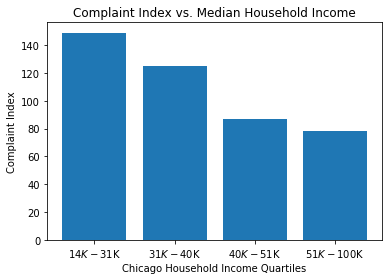

In [73]:
#Kynan create bin bar chart
plt.bar(x_axis, y_axis)
tick_locations = [0, 1, 2, 3]
plt.xticks(tick_locations, bin_labels)
plt.title("Complaint Index vs. Median Household Income")
plt.xlabel("Chicago Household Income Quartiles")
plt.ylabel("Complaint Index")
plt.show
plt.savefig("Income Quartiles vs. Complaint Index.png")

The correlation between both factors is -0.53


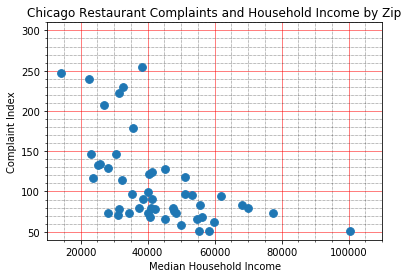

In [74]:
#Kynan Calculate and Visulize the correlation between restaurant complaint index and median household income per zip
income = inspection_demo["Income"]
complaints = inspection_demo["Complaint Index"]
correlation = st.pearsonr(income, complaints)
fig, ax = plt.subplots()
ax.set_axisbelow(True)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(income, complaints, marker = "o", s = 60)
plt.ylim(40, 310)
plt.xlim(10000, 110000)
plt.ylabel("Complaint Index")
plt.xlabel("Median Household Income")
ax.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Chicago Restaurant Complaints and Household Income by Zip")
plt.savefig("Income vs. Complaints.png")

In [75]:
# kynan prepate to look at variance for each quartile using standard deviation and box wisker plots

q1= inspection_demo.loc[inspection_demo["Quartile"]== "$14K - $31K", "Complaint Index"]
q2= inspection_demo.loc[inspection_demo["Quartile"]== "$31K - $40K", "Complaint Index"]
q3 = inspection_demo.loc[inspection_demo["Quartile"]== "$40K - $51K", "Complaint Index"]
q4=  inspection_demo.loc[inspection_demo["Quartile"]== "$51K - $100K", "Complaint Index"]
quarts = [q1, q2, q3, q4]


the $14K -$31K standard deviation is 95
the $31K - $40K standard deviation is 104
the $40K - $51K standard deviation is 23
the $51K - $100K standard deviation is 20


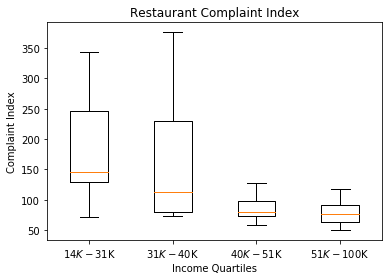

In [76]:
# kynan look at variance for each quartile using standard deviation and box wisker plots
fig1, ax1 = plt.subplots()
ax1.set_title(f'Restaurant Complaint Index')
ax1.set_ylabel('Complaint Index')
ax1.set_xlabel("Income Quartiles")
ax1.set_xticklabels(bin_labels)
ax1.boxplot(quarts)
print(f'the $14K -$31K standard deviation is {round(q1.std())}')
print(f'the $31K - $40K standard deviation is {round(q2.std())}')
print(f'the $40K - $51K standard deviation is {round(q3.std())}')
print(f'the $51K - $100K standard deviation is {round(q4.std())}')
plt.show()
fig1.savefig("Income Quartiles and Complaint Index Variance.png")

In [77]:
#Kynan prep df for gmap visulaiztion by splitting Location columns and converting data to float
inspection_demo[["Lat","Lng"]] = inspection_demo.Location.str.split(",", expand = True,)
gmap_location= inspection_demo[["Lat", "Lng"]].astype(float)


In [78]:
#create map to visualize complaint index by zip
import gmaps
import os
from api_key import g_key

locations = gmap_location
weights = inspection_demo["Complaint Index"]
center = (41.88, -87.63)
markers = locations
gmaps.configure(api_key = g_key)

fig = gmaps.figure(center = center, zoom_level = 10)
fig.add_layer(gmaps.heatmap_layer(locations, weights = weights, dissipating=False, max_intensity=275, point_radius = .03))
fig

ModuleNotFoundError: No module named 'gmaps'

In [79]:
#isolate zip codes from the lowest two income quartiles 
fourth = inspection_demo[~inspection_demo["Quartile"].isin(["$51K - $100K", "$40K - $51K"])]
fourth_location = fourth[["Lat", "Lng"]].astype(float)
decimals = 2    

fourth = fourth.round({"Complaint Index": 0})


In [80]:
info_box_template = """
<dl>
<dt>Zip</dt><dd>{Zip}</dd>
<dt>ci</dt><dd>{Complaint Index}</dd>
</dl>
"""
locations = fourth_location
weights = fourth["Complaint Index"]
center = (41.88, -87.63)
zip_info = [info_box_template.format(**row) for index, row in fourth.iterrows()]
marker_layer = gmaps.marker_layer(fourth_location, info_box_content = zip_info)

gmaps.configure(api_key = g_key)

fig = gmaps.figure(center = center, zoom_level = 11)
fig.add_layer(gmaps.heatmap_layer(locations, weights = weights, dissipating=False, max_intensity=275, point_radius = .03))
fig.add_layer(marker_layer)
fig


NameError: name 'gmaps' is not defined

the correlation between non-english speaking lower income communities and complaints is -0.68


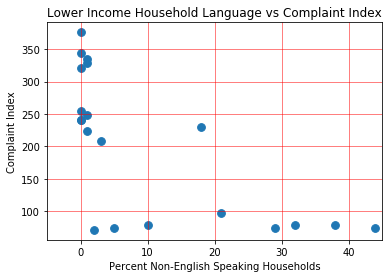

In [81]:
#look at relationship between lanugage and complaints by importing census data
lan_path = "census_language.csv"
lan_request = pd.read_csv(lan_path)

lan_demo = pd.merge(fourth, lan_request, on = "Zip")
lan_demo.head()
language = lan_demo["Non English Speaking %"].astype(float) * 100
index = lan_demo["Complaint Index"]

#create a scatter plot and calcualte correlation
lan_factor_cor= st.pearsonr(language, index)
print(f'the correlation between non-english speaking lower income communities and complaints is {round(lan_factor_cor[0],2)}')
plt.scatter(language, index, marker = "o", s = 60)
plt.xlabel("Percent Non-English Speaking Households")
plt.ylabel("Complaint Index")
plt.title("Lower Income Household Language vs Complaint Index")
plt.xlim(-5, 45, 5)
ax.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("Language vs. Complaints.png")

In [82]:
#Restaurants with Risk 1 violations
zip_df = clean_data.loc[clean_data["Risk"] == 'Risk 1 (High)']
zip_df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208241,2315429,EPIC BURGER,EPIC BURGER,2129721.0,Restaurant,Risk 1 (High),227 E ONTARIO ST,CHICAGO,IL,60611.0,10/4/2019,Canvass,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.893263,-87.621959,"(41.893262977315636, -87.6219587764921)"
208246,2363192,HONKY TONK BARBEQUE,HONKY TONK BARBEQUE,1987119.0,Restaurant,Risk 1 (High),1800 S RACINE AVE,CHICAGO,IL,60608.0,3/3/2020,Complaint,Pass,NaN,41.857882,-87.656574,"(41.85788239331137, -87.65657385684578)"
208250,1559555,JOHNNY'S GRILL I,JOHNNY'S GRILL I,2368611.0,Restaurant,Risk 1 (High),2545-2547 N KEDZIE BLVD,CHICAGO,IL,60647.0,6/25/2015,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.927879,-87.706925,"(41.92787854149625, -87.70692518909259)"
208252,1751404,RAYMOND'S HAMBURGERS & TACOS,RAYMOND'S HAMBURGERS & TACOS,26528.0,Restaurant,Risk 1 (High),2404 S BLUE ISLAND AVE,CHICAGO,IL,60608.0,4/5/2016,Canvass Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.848781,-87.675429,"(41.84878118113963, -87.67542917644128)"


In [83]:
#count number of restaurants in each zip
count_by_zip = restaurants_df.groupby(["Zip"]).count()["Location"]
count_by_zip

Zip
60601.0    3167
60602.0    1332
60603.0    1852
60604.0    1209
60605.0    2707
60606.0    3019
60607.0    4487
60608.0    3339
60609.0    2249
60610.0    3221
60611.0    5701
60612.0    1553
60613.0    3431
60614.0    6260
60615.0    1571
60616.0    3526
60617.0    2090
60618.0    4169
60619.0    2014
60620.0    1926
60621.0     609
60622.0    4825
60623.0    2428
60624.0     938
60625.0    3961
60626.0    2138
60628.0    1646
60629.0    2232
60630.0    1808
60631.0     980
60632.0    2955
60633.0     230
60634.0    2633
60636.0    1109
60637.0    1242
60638.0    1905
60639.0    3257
60640.0    3794
60641.0    2497
60642.0    1761
60643.0    1581
60644.0    1234
60645.0     800
60646.0     981
60647.0    5404
60649.0    1163
60651.0    1385
60652.0    1153
60653.0     961
60654.0    4221
60655.0     531
60656.0     561
60657.0    5930
60659.0    2922
60660.0    2262
60661.0    2456
60666.0    2340
60707.0     766
60827.0      12
Name: Location, dtype: int64

In [84]:
#Number of High Risk Restaurants by Zip code
count_of_risk = zip_df.groupby(["Zip"]).count()["Location"]
count_of_risk

Zip
60601.0    2408
60602.0    1040
60603.0    1484
60604.0     846
60605.0    1988
60606.0    2396
60607.0    3661
60608.0    2508
60609.0    1583
60610.0    2629
60611.0    4574
60612.0    1029
60613.0    2640
60614.0    4919
60615.0    1121
60616.0    2742
60617.0    1367
60618.0    3346
60619.0    1157
60620.0    1034
60621.0     232
60622.0    3799
60623.0    1898
60624.0     446
60625.0    3123
60626.0    1637
60628.0     856
60629.0    1646
60630.0    1435
60631.0     776
60632.0    2226
60633.0     170
60634.0    2094
60636.0     557
60637.0     798
60638.0    1304
60639.0    2328
60640.0    3141
60641.0    1990
60642.0    1338
60643.0    1052
60644.0     719
60645.0     627
60646.0     825
60647.0    4252
60649.0     711
60651.0     733
60652.0     754
60653.0     638
60654.0    3479
60655.0     365
60656.0     472
60657.0    4741
60659.0    2441
60660.0    1714
60661.0    2002
60666.0    1610
60707.0     562
60827.0       3
Name: Location, dtype: int64

In [85]:
#percentage of high risk restaurants

percent= count_of_risk/count_by_zip  *100
percent

Zip
60601.0    76.034102
60602.0    78.078078
60603.0    80.129590
60604.0    69.975186
60605.0    73.439232
60606.0    79.364028
60607.0    81.591264
60608.0    75.112309
60609.0    70.386839
60610.0    81.620615
60611.0    80.231538
60612.0    66.258854
60613.0    76.945497
60614.0    78.578275
60615.0    71.355824
60616.0    77.765173
60617.0    65.406699
60618.0    80.259055
60619.0    57.447865
60620.0    53.686397
60621.0    38.095238
60622.0    78.735751
60623.0    78.171334
60624.0    47.547974
60625.0    78.843726
60626.0    76.566885
60628.0    52.004860
60629.0    73.745520
60630.0    79.369469
60631.0    79.183673
60632.0    75.329949
60633.0    73.913043
60634.0    79.529054
60636.0    50.225428
60637.0    64.251208
60638.0    68.451444
60639.0    71.476819
60640.0    82.788614
60641.0    79.695635
60642.0    75.979557
60643.0    66.540164
60644.0    58.265802
60645.0    78.375000
60646.0    84.097859
60647.0    78.682457
60649.0    61.134996
60651.0    52.924188
60652.0  

In [86]:
#Set restaurant Risk 1 info into dataframe
data = pd.DataFrame({"Number of Restaurants":count_by_zip,"Number of Risk 1(High)":count_of_risk, "Percentage of High Risk":percent})       
data.style.format({'Percentge of High Risk':"{:.2f}%"})

,Number of Restaurants,Number of Risk 1(High),Percentage of High Risk
Zip,,,
60601.0,3167,2408,76.034102
60602.0,1332,1040,78.078078
60603.0,1852,1484,80.129590
60604.0,1209,846,69.975186
60605.0,2707,1988,73.439232
60606.0,3019,2396,79.364028
60607.0,4487,3661,81.591264
60608.0,3339,2508,75.112309
60609.0,2249,1583,70.386839


In [87]:
total_risk = clean_data["Risk"].value_counts()
total_risk

Risk 1 (High)      103971
Risk 2 (Medium)     23467
Risk 3 (Low)         1350
All                     8
Name: Risk, dtype: int64

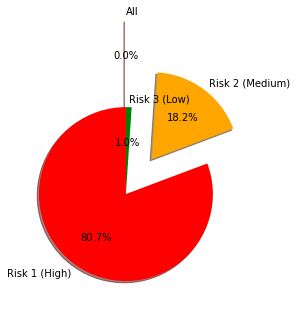

In [88]:
# Labels for the sections of our pie chart
labels = ["Risk 1 (High)", "Risk 2 (Medium)", "Risk 3 (Low)", "All"]

# The values of each section of the pie chart
sizes = total_risk

# The colors of each section of the pie chart
colors = ["red", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0,0.5,0,1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.savefig("Risk.png")

plt.show()

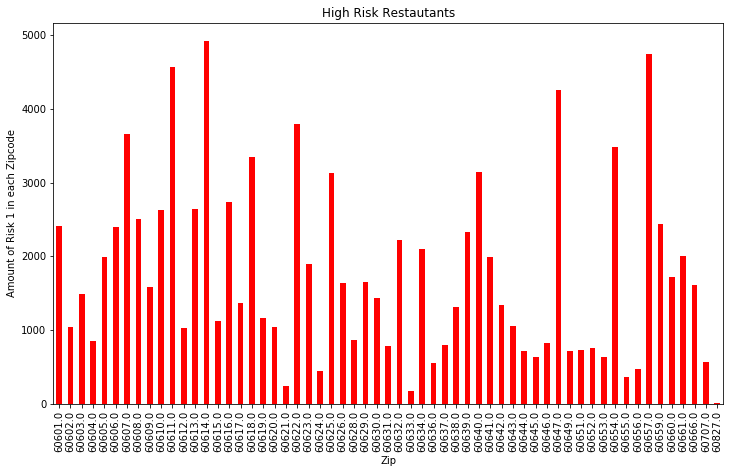

In [89]:
#Bargrapgh that displays all risk one restaurants by zip code
count_of_risk.plot(kind="bar", color="red", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("High Risk Restautants")
plt.xlabel("Zip")
plt.ylabel("Amount of Risk 1 in each Zipcode")

#show chart and set layout

plt.savefig("Bar.png")
plt.show()